# Perguntas a responder

1 - Qual a quantidade de clientes incritos efetivos e quantidade de saintes da campanha?

2 - A adoção da campanha foi mais bem-sucedida para certos dados demográficos de membros de fidelidade?

3 - Que impacto teve a campanha nos voos reservados durante o verão de 2018?

4 - Posso criar um modelo de machine learning para prever o risco de Churn?

Temos dados para o período 2012 - 2018 dos titulares do cartão fidelidade
E dois anos 2017-2018 de dados de voos
A campanha de 2018 participou durante 3 meses de fevereiro a abril daquele ano
Aqueles que participaram da promoção, reservaram voos apenas em 2017 e 2018 anos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data_flight = pd.read_csv('Customer Flight Activity.csv')
data_history = pd.read_csv('Customer Loyalty History.csv')

In [3]:
data_flight.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [22]:
data_history.head(20)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Date
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2016-02-01
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN,2016-03-01
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0,2014-07-01
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN,2013-02-01
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN,2014-10-01
5,193662,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124.0,Married,Star,3844.57,Standard,2012,5,NaN,NaN,2012-05-01
6,927943,Canada,Ontario,Toronto,P5S 6R4,Female,College,NaN,Single,Star,3857.95,Standard,2014,6,NaN,NaN,2014-06-01
7,188893,Canada,Ontario,Trenton,K8V 4B2,Male,Bachelor,100159.0,Married,Star,3861.49,Standard,2016,12,NaN,NaN,2016-12-01
8,852392,Canada,Quebec,Montreal,H2Y 2W2,Female,Bachelor,100159.0,Married,Star,3861.49,Standard,2015,5,NaN,NaN,2015-05-01
9,866307,Canada,Ontario,Toronto,M8Y 4K8,Male,Bachelor,100159.0,Married,Star,3861.49,Standard,2016,10,NaN,NaN,2016-10-01


In [5]:
data_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [6]:
data_history.isna().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [7]:

data_history['Date'] = pd.to_datetime(
    data_history['Enrollment Year'].astype(str) + '-' + 
    data_history['Enrollment Month'].astype(str) + '-01'
)

In [8]:
# Meses que tiveram campanha no ano de 2018
filtra_campanha = data_history[data_history['Enrollment Type'] == '2018 Promotion']
filtra_campanha['Enrollment Month'].unique()

array([3, 4, 2], dtype=int64)

In [20]:
filtra_campanha

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Date
18,172755,Canada,Alberta,Edmonton,T3G 6Y6,Female,College,NaN,Single,Aurora,5303.76,2018 Promotion,2018,3,NaN,NaN,2018-03-01
36,938981,Canada,Alberta,Edmonton,T3G 6Y6,Female,College,NaN,Single,Aurora,5337.35,2018 Promotion,2018,4,NaN,NaN,2018-04-01
65,386082,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,30486.0,Divorced,Aurora,5391.97,2018 Promotion,2018,3,2018.0,11.0,2018-03-01
69,112522,Canada,Alberta,Peace River,T9O 2W2,Male,Bachelor,49846.0,Married,Aurora,5636.74,2018 Promotion,2018,2,NaN,NaN,2018-02-01
73,330694,Canada,Alberta,Edmonton,T3G 6Y6,Female,Bachelor,105053.0,Married,Aurora,6172.91,2018 Promotion,2018,2,NaN,NaN,2018-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16673,368435,Canada,Yukon,Whitehorse,Y2K 6R0,Female,Bachelor,73695.0,Married,Nova,8707.62,2018 Promotion,2018,4,2018.0,12.0,2018-04-01
16676,828109,Canada,Yukon,Whitehorse,Y2K 6R0,Female,Bachelor,74049.0,Divorced,Nova,13009.24,2018 Promotion,2018,3,2018.0,11.0,2018-03-01
16698,909547,Canada,Yukon,Whitehorse,Y2K 6R0,Female,Bachelor,54567.0,Married,Star,5759.01,2018 Promotion,2018,4,NaN,NaN,2018-04-01
16706,409984,Canada,Yukon,Whitehorse,Y2K 6R0,Male,College,NaN,Single,Star,7452.23,2018 Promotion,2018,4,2018.0,12.0,2018-04-01


## 1 - Qual a quantidade de clientes incritos efetivos e quantidade de saintes da campanha?

In [9]:
# Quantidade de inscrições no ano de 2018
contagem_filtra_campanha = filtra_campanha.shape[0]

# Filtragem de incrições canceladas no ano de 2018 nos meses de Fevereiro, Março e Abril
promo_cancelada_2018 = data_history[(data_history['Cancellation Year'] == 2018) & (data_history['Cancellation Month'].isin([2, 3, 4]))]

# Outputs
print('Cadastro na Promoção: ', contagem_filtra_campanha)
print('Cadastros Cancelados:', promo_cancelada_2018.shape[0])
print('Assinaturas finais da Promoção: ', contagem_filtra_campanha - promo_cancelada_2018.shape[0]) # Número de assinaturas que não foram canceladas.


Cadastro na Promoção:  971
Cadastros Cancelados: 141
Assinaturas finais da Promoção:  830


In [10]:
# Filtrar dados dos anos de 2017 e 2018
data_promocao = data_history[(data_history['Enrollment Year'] >= 2017) & 
                             (data_history['Enrollment Year'] <= 2018)]

# Contagem incrições por mês
contagem_inscricao = data_promocao.groupby(['Enrollment Year', 'Enrollment Month']).size().reset_index(name='Count')

# Highlighting the promotion period
contagem_inscricao['Promotion Period'] = contagem_inscricao.apply(
    lambda x: 'Fev-Abr 2018' if (x['Enrollment Year'] == 2018 and 2 <= x['Enrollment Month'] <= 4) else 'Other', 
    axis=1
)

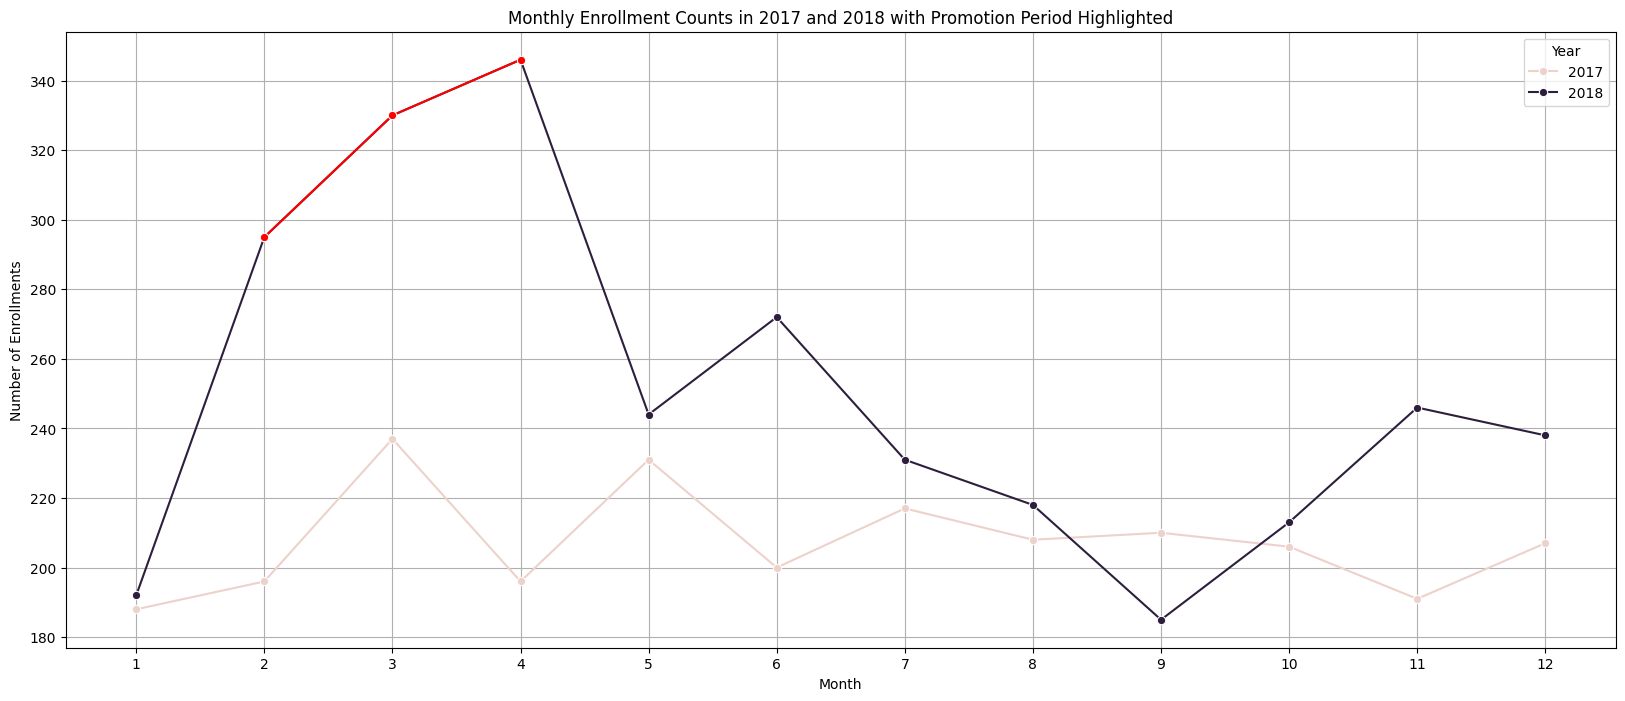

In [11]:
# Plotting enrollments for 2017 and 2018 with the promotion period highlighted
plt.figure(figsize=(20, 8))
sns.lineplot(data=contagem_inscricao, x='Enrollment Month', y='Count', hue='Enrollment Year', marker='o')

# Adding a line for the promotion period
periodo_promocao = contagem_inscricao[contagem_inscricao['Promotion Period'] == 'Fev-Abr 2018']
sns.lineplot(data=periodo_promocao, x='Enrollment Month', y='Count', color='red', marker='o')

plt.title('Monthly Enrollment Counts in 2017 and 2018 with Promotion Period Highlighted')
plt.xlabel('Month')
plt.ylabel('Number of Enrollments')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.grid(True)
plt.show()

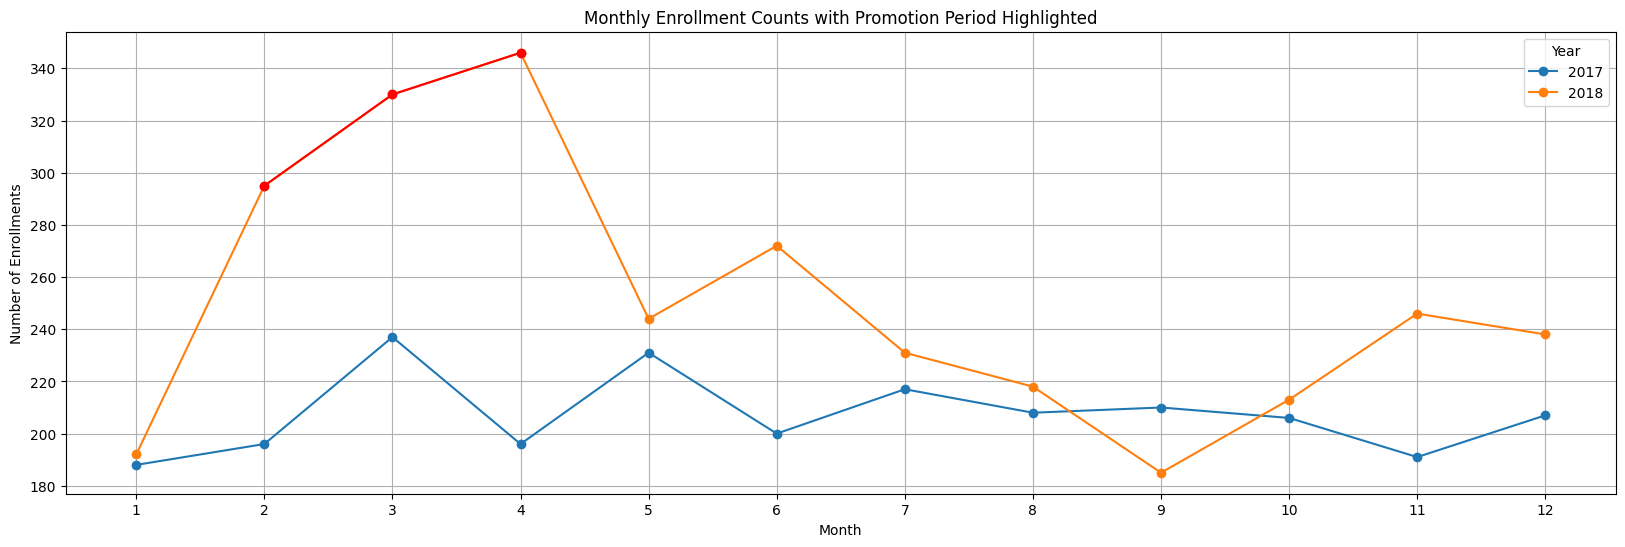

In [12]:
# Criando o gráfico de linha para as inscrições de 2017 e 2018
plt.figure(figsize=(20, 6))
for year in [2017, 2018]:
    ano = contagem_inscricao[contagem_inscricao['Enrollment Year'] == year]
    plt.plot(ano['Enrollment Month'], ano['Count'], marker='o',label=str(year))

# Destacando o período de promoção
plt.plot(periodo_promocao['Enrollment Month'], periodo_promocao['Count'], color='red', marker='o')

# Adicionando título e rótulos aos eixos
plt.title('Monthly Enrollment Counts with Promotion Period Highlighted')
plt.xlabel('Month')
plt.ylabel('Number of Enrollments')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.grid(True)

# Exibindo o gráfico
plt.show()


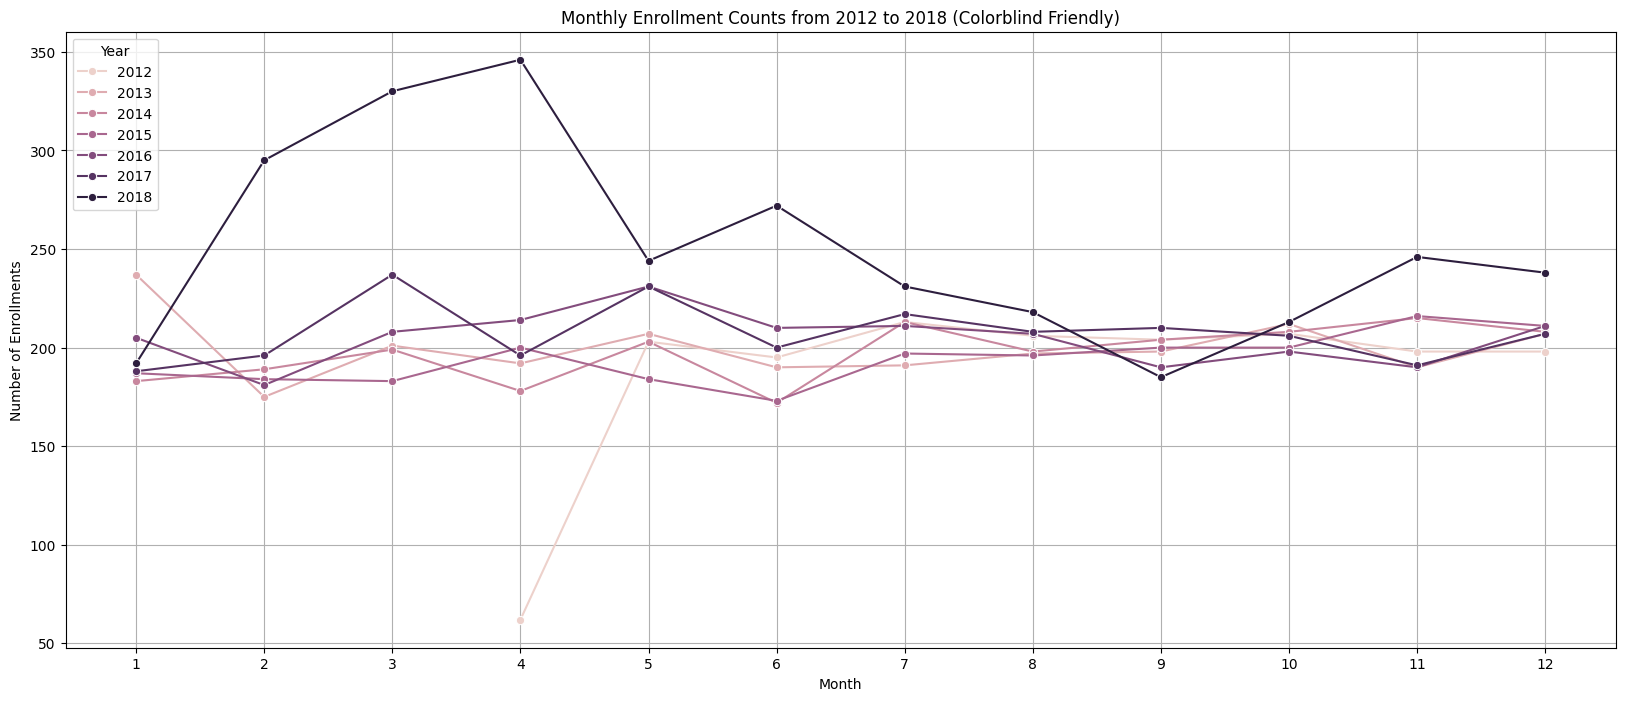

In [13]:
# Contagem de inscrições por mês de todo os ano.
todas_inscricoes_por_ano = data_history.groupby(['Enrollment Year', 'Enrollment Month']).size().reset_index(name='Count')

# Gráfico de inscrições de 2012 à 2018
plt.figure(figsize=(20, 8))
sns.lineplot(data=todas_inscricoes_por_ano, x='Enrollment Month', y='Count', hue='Enrollment Year', marker='o')

plt.title('Monthly Enrollment Counts from 2012 to 2018 (Colorblind Friendly)')
plt.xlabel('Month')
plt.ylabel('Number of Enrollments')
plt.xticks(range(1, 13))
plt.legend(title='Year', loc='upper left')
plt.grid(True)
plt.show()

Part 2: Was the campaign adoption more successful for certain demographics of loyalty members?

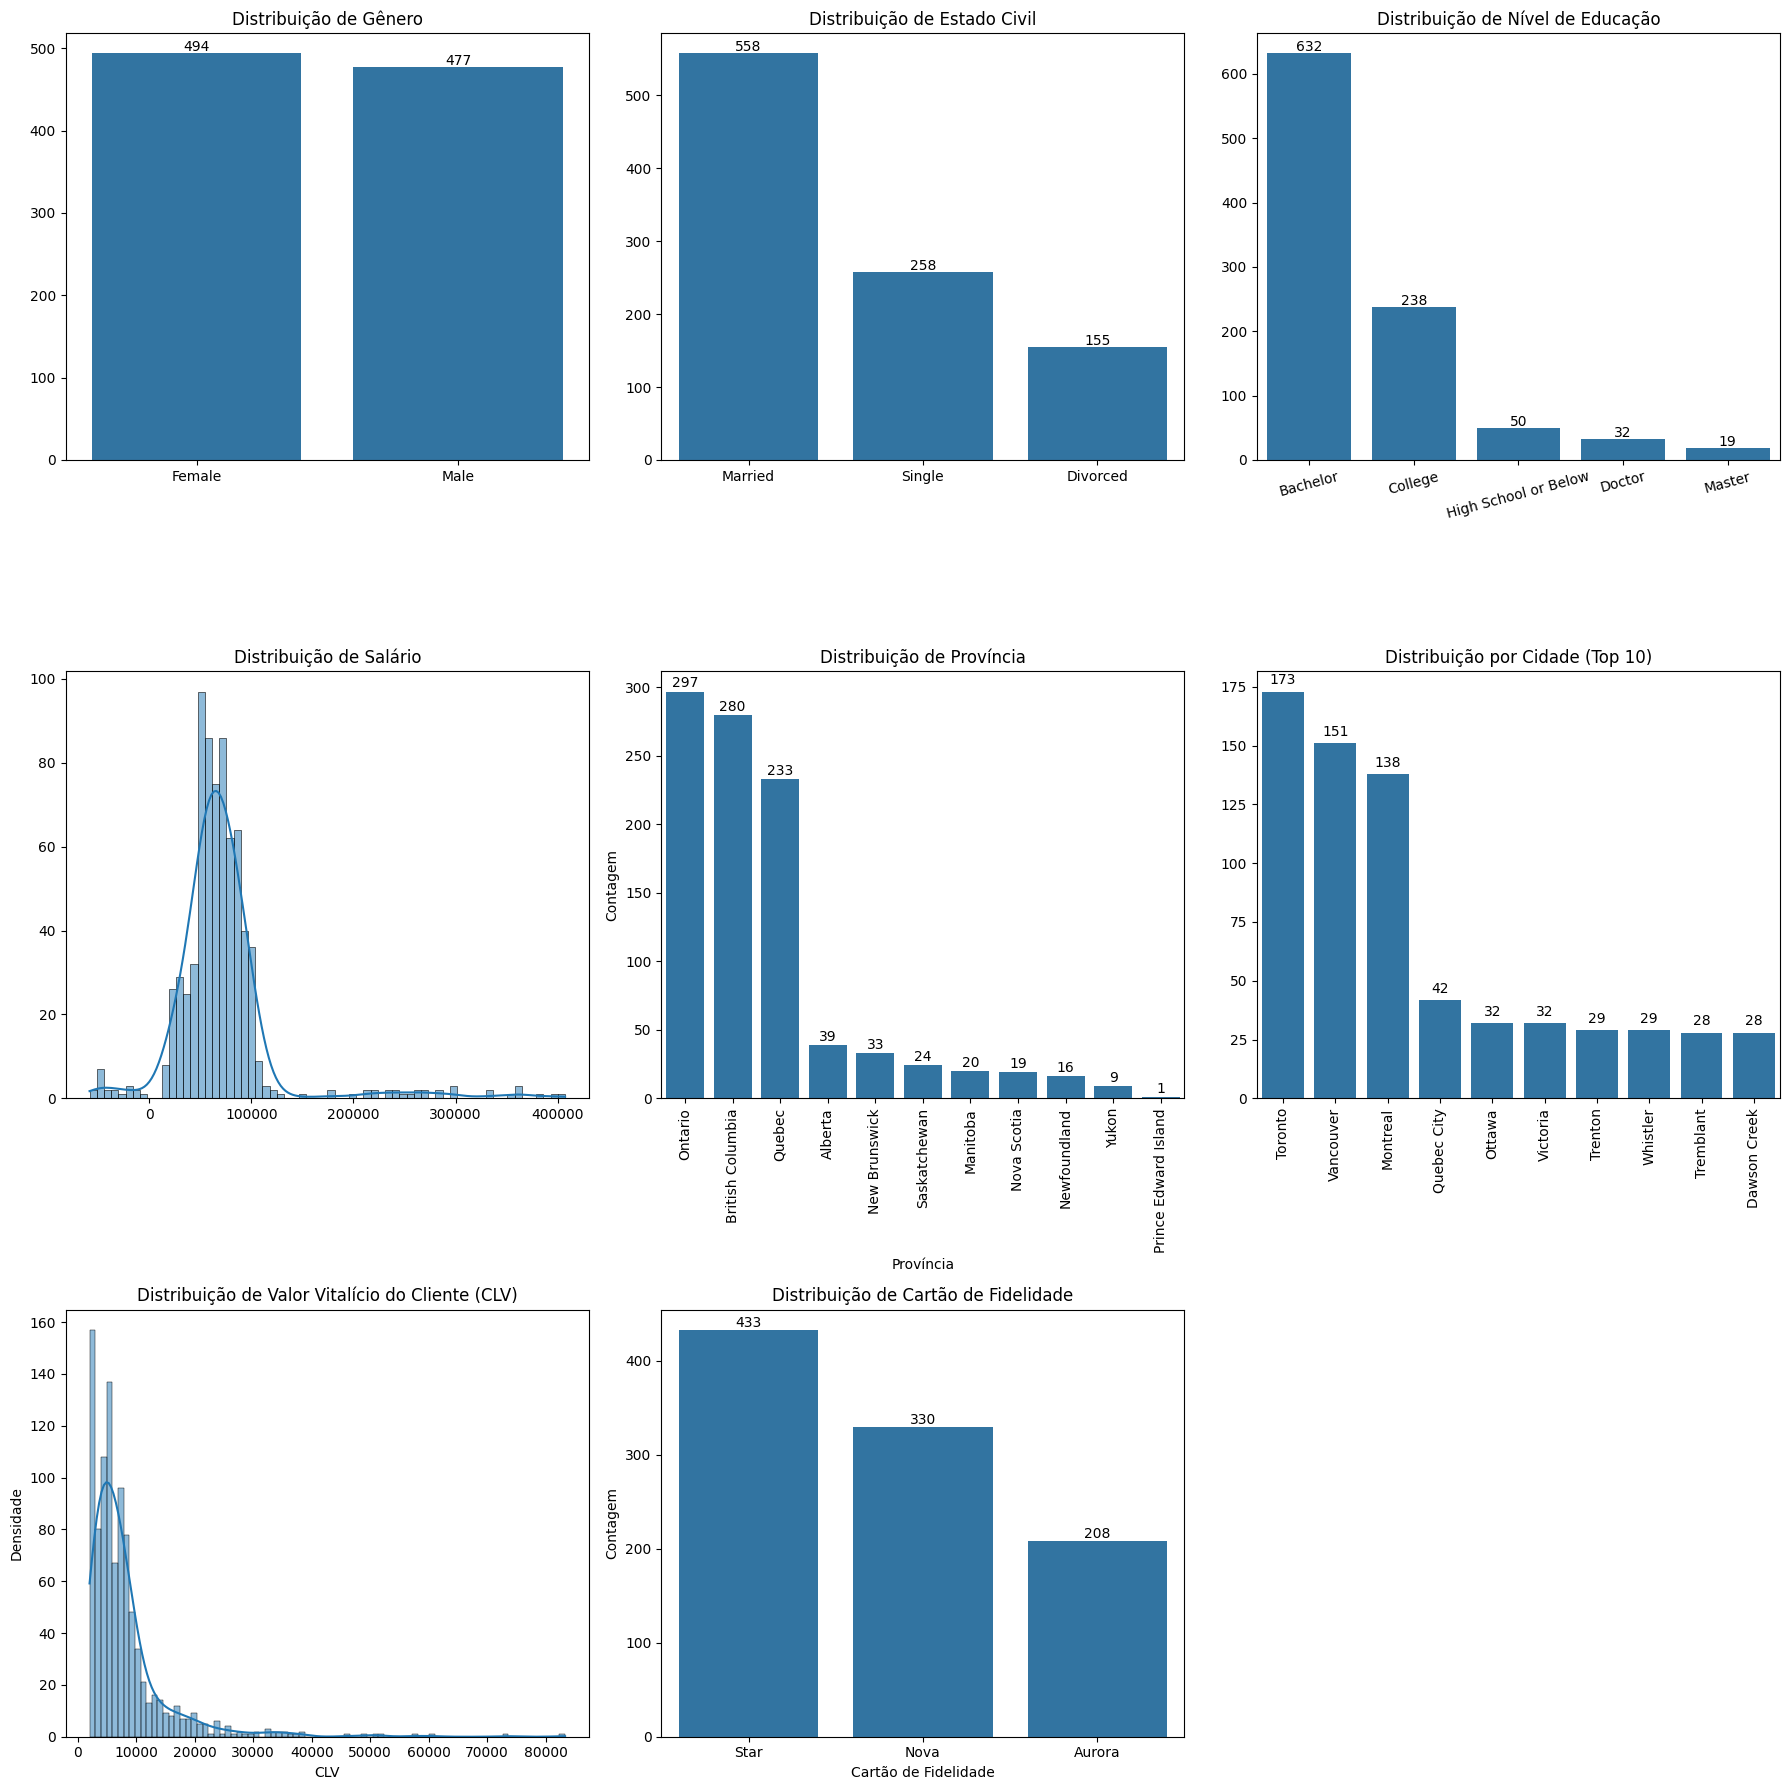

In [66]:
# Configurando o layout dos subplots
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# 1. Distribuição de Gênero
order = filtra_campanha['Gender'].value_counts().index
ax1 = sns.countplot(data=filtra_campanha, x='Gender', ax=axs[0, 0], order = order)
ax1.set_title('Distribuição de Gênero')
ax1.set_xlabel('')
ax1.set_ylabel('')

# Adicionando o valor total de cada barra
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 

# 2. Distribuição de Estado Civil
order = filtra_campanha['Marital Status'].value_counts().index
ax2 = sns.countplot(data=filtra_campanha, x='Marital Status', ax=axs[0, 1], order=order)
ax2.set_title('Distribuição de Estado Civil')
ax2.set_xlabel('')
ax2.set_ylabel('')

# Adicionando o valor total de cada barra
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 

# 3. Distribuição de Nível de Educação
order = filtra_campanha['Education'].value_counts().index
ax3 = sns.countplot(data=filtra_campanha, x='Education', ax=axs[0, 2], order = order)
ax3.set_title('Distribuição de Nível de Educação')
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.tick_params(axis='x', rotation=15)

# Adicionando o valor total de cada barra
for p in ax3.patches:
    height = p.get_height()
    ax3.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 


# 4. Distribuição de Salário
sns.histplot(data=filtra_campanha, x='Salary', kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribuição de Salário')
axs[1, 0].set_xlabel('')
axs[1, 0].set_ylabel('')

# 5. Distribuição de Província
order = filtra_campanha['Province'].value_counts().index
ax5 = sns.countplot(data=filtra_campanha, x='Province', ax=axs[1, 1], order = order)
ax5.set_title('Distribuição de Província')
ax5.set_xlabel('Província')
ax5.set_ylabel('Contagem')
ax5.tick_params(axis='x', rotation=90)

# Adicionando o valor total de cada barra
for p in ax5.patches:
    height = p.get_height()
    ax5.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 

# 6. Distribuição por Cidade (Top 10)
top_cities = filtra_campanha['City'].value_counts().index[:10]
filtered_city_data = filtra_campanha[filtra_campanha['City'].isin(top_cities)]
ax6 = sns.countplot(data=filtered_city_data, x='City', ax=axs[1, 2], order=top_cities)
ax6.set_title('Distribuição por Cidade (Top 10)')
ax6.set_xlabel('')
ax6.set_ylabel('')
ax6.tick_params(axis='x', rotation=90)

# Adicionando o valor total de cada barra
for p in ax6.patches:
    height = p.get_height()
    ax6.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 
    
    
# 7. Distribuição de Valor Vitalício do Cliente (CLV)
sns.histplot(data=filtra_campanha, x='CLV', kde=True, ax=axs[2, 0])
axs[2, 0].set_title('Distribuição de Valor Vitalício do Cliente (CLV)')
axs[2, 0].set_xlabel('CLV')
axs[2, 0].set_ylabel('Densidade')


# 8. Distribuição de Cartão de Fidelidade (Loyalty Card)
order = filtra_campanha['Loyalty Card'].value_counts().index
ax8 = sns.countplot(data=filtra_campanha, x='Loyalty Card', ax=axs[2, 1], order = order)
ax8.set_title('Distribuição de Cartão de Fidelidade')
ax8.set_xlabel('Cartão de Fidelidade')
ax8.set_ylabel('Contagem')

# Adicionando o valor total de cada barra
for p in ax8.patches:
    height = p.get_height()
    ax8.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 


# Removendo o subplot vazio
fig.delaxes(axs[2,2])

# Ajustando o layout
plt.tight_layout()

# Mostrando o plot
plt.show()


Distribuição de Gênero: Há 494 indivíduos do gênero feminino e 477 do gênero masculino, indicando uma distribuição quase igual entre os gêneros.

Distribuição de Estado Civil: A maioria dos clientes é casada (558), seguida por solteiros (258) e divorciados (155).

Distribuição de Nível de Educação: A maior parte dos clientes possui bacharelado (632), seguida por aqueles com educação colegial (238), ensino médio (50), doutorado (32) e mestrado (19).

Distribuição de Salário: A distribuição de salários mostra uma concentração maior em faixas salariais mais baixas, com uma queda acentuada conforme o salário aumenta.

Distribuição de Província: A província com o maior número de clientes é a de Ontario (297), seguida por British Columbia (280) e Quebec (233). As outras províncias têm uma representação significativamente menor.

Distribuição por Cidade (Top 10): A cidade com o maior número de clientes é Toronto (173), seguida por Vancouver (151) e Montreal (138). As outras cidades do top 10 têm menos de 100 clientes cada.

Distribuição de Cartão de Fidelidade: Entre os tipos de cartões de fidelidade, o cartão Star é o mais comum (433), seguido pelo cartão Nova (330) e pelo cartão Aurora (208).

Essa análise descritiva sugere que a campanha de marketing pode ter tido mais sucesso entre indivíduos casados, com nível de educação de bacharelado, e residentes nas províncias de Star, Catina e Cygnus. Além disso, o cartão de fidelidade Star parece ser o mais popular entre os clientes. Essas informações podem ser úteis para direcionar futuras campanhas de marketing e para entender melhor o perfil dos clientes que se engajam com programas de fidelidade.

In [99]:
filtra_campanha

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Date
18,172755,Canada,Alberta,Edmonton,T3G 6Y6,Female,College,NaN,Single,Aurora,5303.76,2018 Promotion,2018,3,NaN,NaN,2018-03-01
36,938981,Canada,Alberta,Edmonton,T3G 6Y6,Female,College,NaN,Single,Aurora,5337.35,2018 Promotion,2018,4,NaN,NaN,2018-04-01
65,386082,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,30486.0,Divorced,Aurora,5391.97,2018 Promotion,2018,3,2018.0,11.0,2018-03-01
69,112522,Canada,Alberta,Peace River,T9O 2W2,Male,Bachelor,49846.0,Married,Aurora,5636.74,2018 Promotion,2018,2,NaN,NaN,2018-02-01
73,330694,Canada,Alberta,Edmonton,T3G 6Y6,Female,Bachelor,105053.0,Married,Aurora,6172.91,2018 Promotion,2018,2,NaN,NaN,2018-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16673,368435,Canada,Yukon,Whitehorse,Y2K 6R0,Female,Bachelor,73695.0,Married,Nova,8707.62,2018 Promotion,2018,4,2018.0,12.0,2018-04-01
16676,828109,Canada,Yukon,Whitehorse,Y2K 6R0,Female,Bachelor,74049.0,Divorced,Nova,13009.24,2018 Promotion,2018,3,2018.0,11.0,2018-03-01
16698,909547,Canada,Yukon,Whitehorse,Y2K 6R0,Female,Bachelor,54567.0,Married,Star,5759.01,2018 Promotion,2018,4,NaN,NaN,2018-04-01
16706,409984,Canada,Yukon,Whitehorse,Y2K 6R0,Male,College,NaN,Single,Star,7452.23,2018 Promotion,2018,4,2018.0,12.0,2018-04-01


In [101]:
filtra_campanha['City'].value_counts().reset_index().sort_values(by = 'count', ascending = False)

,City,count
0,Toronto,173
1,Vancouver,151
2,Montreal,138
3,Quebec City,42
4,Ottawa,32
5,Victoria,32
6,Trenton,29
7,Whistler,29
8,Tremblant,28
9,Dawson Creek,28


In [15]:
aux1 = df.groupby(['Month', 'Year'])['Total Flights'].sum().reset_index()
aux1

NameError: name 'df' is not defined

In [16]:
# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=aux1, x='Month', y='Total Flights', hue='Year', color = 'blue')
plt.title('Total de Voos por Mês')
plt.xlabel('Mês')
plt.ylabel('Total de Voos')
plt.legend(title='Ano')
plt.tight_layout()
plt.show()

NameError: name 'aux1' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
df1.Salary[df1.Salary <0].reset_index().sort_values(by = 'Salary')

: 

: 

: 

: 

: 

: 